<a href="https://colab.research.google.com/github/Divyank1977/trader-and-market-sentiment-analysis/blob/main/ds_divyank/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q gdown pandas matplotlib seaborn statsmodels scikit-learn scipy tqdm


In [8]:
import os
import gdown
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.cluster import KMeans
from tqdm import tqdm


In [9]:
os.makedirs("ds_divyank", exist_ok=True)
os.makedirs("ds_divyank/csv_files", exist_ok=True)
os.makedirs("ds_divyank/outputs", exist_ok=True)


In [10]:

trades_file = "ds_divyank/csv_files/historical_data.csv"
fg_file = "ds_divyank/csv_files/fear_greed_index.csv"


In [11]:
trades = pd.read_csv(trades_file, parse_dates=True, low_memory=False)
fg = pd.read_csv(fg_file, parse_dates=True, low_memory=False)

print("trades shape:", trades.shape)
print("fg shape:", fg.shape)



trades shape: (51122, 16)
fg shape: (2644, 4)


In [12]:
for col in trades.columns:
    if col.lower() == 'timestamp ist':
        trades['time'] = pd.to_datetime(
            trades[col],
            format='%d-%m-%Y %H:%M',
            errors='coerce'
        )
        break

trades



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,291.56,5108.71,SELL,05-03-2025 00:27,5830.950000,Close Long,184.586636,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.788050,4.010000e+14,1.740000e+12,2025-03-05 00:27:00
51118,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,118.81,2081.79,SELL,05-03-2025 00:27,5539.390000,Close Long,75.218611,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.728626,9.490000e+12,1.740000e+12,2025-03-05 00:27:00
51119,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,250.00,4380.50,SELL,05-03-2025 00:27,5420.580000,Close Long,158.275000,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.533175,4.530000e+14,1.740000e+12,2025-03-05 00:27:00
51120,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5210,94.44,1654.68,SELL,05-03-2025 00:27,5170.580000,Close Long,59.695524,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.579139,1.020000e+15,1.740000e+12,2025-03-05 00:27:00


In [13]:
trades['date'] = pd.to_datetime(trades['time'], errors='coerce').dt.floor('D')
trades

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,291.56,5108.71,SELL,05-03-2025 00:27,5830.950000,Close Long,184.586636,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.788050,4.010000e+14,1.740000e+12,2025-03-05 00:27:00,2025-03-05
51118,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,118.81,2081.79,SELL,05-03-2025 00:27,5539.390000,Close Long,75.218611,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.728626,9.490000e+12,1.740000e+12,2025-03-05 00:27:00,2025-03-05
51119,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,250.00,4380.50,SELL,05-03-2025 00:27,5420.580000,Close Long,158.275000,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.533175,4.530000e+14,1.740000e+12,2025-03-05 00:27:00,2025-03-05
51120,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5210,94.44,1654.68,SELL,05-03-2025 00:27,5170.580000,Close Long,59.695524,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.579139,1.020000e+15,1.740000e+12,2025-03-05 00:27:00,2025-03-05


In [14]:
def safe_numeric(df, col):
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

safe_numeric(trades, 'execution price')
safe_numeric(trades, 'execution_price')
safe_numeric(trades, 'price')
safe_numeric(trades, 'size tokens')
safe_numeric(trades, 'size usd')
safe_numeric(trades, 'closed PnL')
safe_numeric(trades, 'fee')

In [15]:
trades


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,291.56,5108.71,SELL,05-03-2025 00:27,5830.950000,Close Long,184.586636,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.788050,4.010000e+14,1.740000e+12,2025-03-05 00:27:00,2025-03-05
51118,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,118.81,2081.79,SELL,05-03-2025 00:27,5539.390000,Close Long,75.218611,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.728626,9.490000e+12,1.740000e+12,2025-03-05 00:27:00,2025-03-05
51119,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,250.00,4380.50,SELL,05-03-2025 00:27,5420.580000,Close Long,158.275000,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.533175,4.530000e+14,1.740000e+12,2025-03-05 00:27:00,2025-03-05
51120,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5210,94.44,1654.68,SELL,05-03-2025 00:27,5170.580000,Close Long,59.695524,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.579139,1.020000e+15,1.740000e+12,2025-03-05 00:27:00,2025-03-05


In [16]:
for c in fg.columns:
    if 'timestamp' in c.lower():
        fg['Timestamp'] = pd.to_datetime(fg[c], unit='s' )
        break

for c in trades.columns:

    if 'timestamp' in c.lower():
        trades['Timestamp'] = pd.to_datetime(
            trades[col],
            format='%d-%m-%Y %H:%M',
            errors='coerce'
        )
        break



trades


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.005600,4.430000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050431,6.600000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050043,1.080000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.003055,1.050000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,291.56,5108.71,SELL,05-03-2025 00:27,5830.950000,Close Long,184.586636,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.788050,4.010000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05
51118,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,118.81,2081.79,SELL,05-03-2025 00:27,5539.390000,Close Long,75.218611,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.728626,9.490000e+12,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05
51119,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,250.00,4380.50,SELL,05-03-2025 00:27,5420.580000,Close Long,158.275000,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.533175,4.530000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05
51120,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5210,94.44,1654.68,SELL,05-03-2025 00:27,5170.580000,Close Long,59.695524,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.579139,1.020000e+15,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05


In [17]:
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')


print("Data Type:", fg['date'].dtype)
print("Data Type:", trades['date'].dtype)
trades



Data Type: datetime64[ns]
Data Type: datetime64[ns]


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.005600,4.430000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050431,6.600000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.050043,1.080000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.003055,1.050000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,291.56,5108.71,SELL,05-03-2025 00:27,5830.950000,Close Long,184.586636,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.788050,4.010000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05
51118,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,118.81,2081.79,SELL,05-03-2025 00:27,5539.390000,Close Long,75.218611,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.728626,9.490000e+12,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05
51119,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,250.00,4380.50,SELL,05-03-2025 00:27,5420.580000,Close Long,158.275000,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,1.533175,4.530000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05
51120,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5210,94.44,1654.68,SELL,05-03-2025 00:27,5170.580000,Close Long,59.695524,0x8f0415e60b961e01eda0041ee854650201eb00bbe978...,77155872593,TRUE,0.579139,1.020000e+15,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05


/tmp/ipython-input-198956023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_trades['leverage'] = valid_trades['Size USD'] / valid_trades['Start Position']


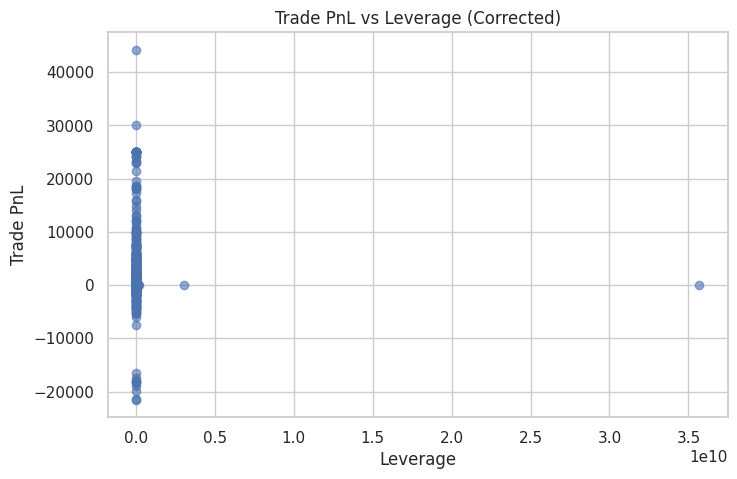

/tmp/ipython-input-198956023.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_trades['leverage_clipped'] = valid_trades['leverage'].clip(upper=50)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,time,date,classification,value,exposure,weekday,signed_pnl,leverage
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,...,8.950000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,7872.16,0,0.000000,100.000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,...,4.430000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,127.68,0,0.000000,0.129424
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,...,6.600000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,1150.63,0,0.000000,1.147739
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,...,1.080000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,1142.04,0,0.000000,0.996059
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,...,1.050000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,69.75,0,0.000000,0.054091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,291.56,5108.71,SELL,05-03-2025 00:27,5830.950000,Close Long,184.586636,...,4.010000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,5108.71,2,184.586636,0.876137
51118,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,118.81,2081.79,SELL,05-03-2025 00:27,5539.390000,Close Long,75.218611,...,9.490000e+12,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,2081.79,2,75.218611,0.375816
51119,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,250.00,4380.50,SELL,05-03-2025 00:27,5420.580000,Close Long,158.275000,...,4.530000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,4380.50,2,158.275000,0.808124
51120,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5210,94.44,1654.68,SELL,05-03-2025 00:27,5170.580000,Close Long,59.695524,...,1.020000e+15,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,1654.68,2,59.695524,0.320018


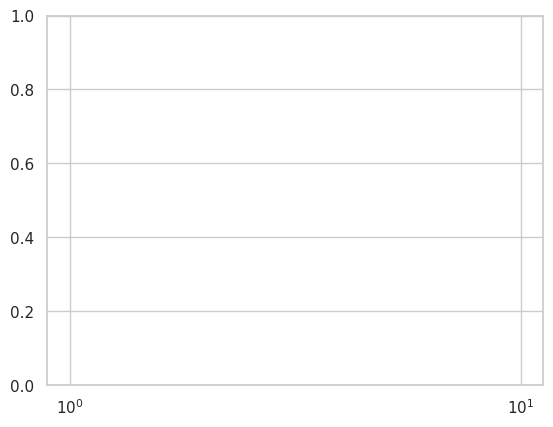

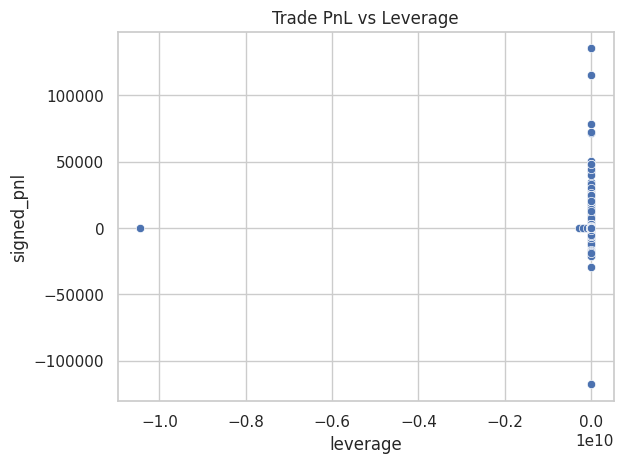

In [38]:
sns.scatterplot(data=trades, x='leverage', y='signed_pnl')
plt.title("Trade PnL vs Leverage")
plt.show()


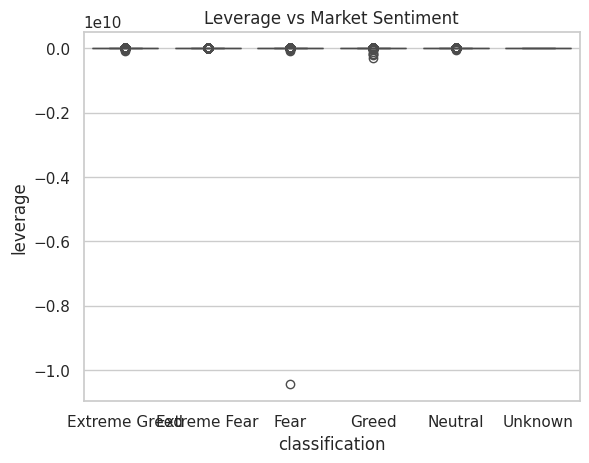

In [40]:
sns.boxplot(data=trades, x='classification', y='leverage')
plt.title("Leverage vs Market Sentiment")
plt.show()


In [18]:
# Merge trade-level sentiment
trades = trades.merge(fg[['date','classification','value']], on='date', how='left')
trades['classification'].fillna('Unknown', inplace=True)
trades['value'].fillna('Unknown', inplace=True)
trades[['date','classification','value']].drop_duplicates().head()

/tmp/ipython-input-2299011181.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trades['classification'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2299011181.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,date,classification,value
0,2024-12-02,Extreme Greed,80.0
44,2024-12-03,Extreme Greed,76.0
189,2024-12-04,Extreme Greed,78.0
190,2025-03-04,Extreme Fear,15.0
211,2025-03-05,Extreme Fear,20.0


In [19]:
if 'Size USD' in trades.columns:
    trades['exposure'] = pd.to_numeric(trades['Size USD'], errors='coerce')

if 'time' in trades.columns:
    trades['weekday'] = trades['time'].dt.weekday


if 'Closed PnL' in trades.columns:
    trades['signed_pnl'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')


In [20]:
trades


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,time,date,classification,value,exposure,weekday,signed_pnl
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,...,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,7872.16,0,0.000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,...,0.005600,4.430000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,127.68,0,0.000000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,...,0.050431,6.600000e+14,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,1150.63,0,0.000000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,...,0.050043,1.080000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,1142.04,0,0.000000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,...,0.003055,1.050000e+15,2024-12-02 22:50:00,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0,69.75,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,291.56,5108.71,SELL,05-03-2025 00:27,5830.950000,Close Long,184.586636,...,1.788050,4.010000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,5108.71,2,184.586636
51118,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,118.81,2081.79,SELL,05-03-2025 00:27,5539.390000,Close Long,75.218611,...,0.728626,9.490000e+12,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,2081.79,2,75.218611
51119,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5220,250.00,4380.50,SELL,05-03-2025 00:27,5420.580000,Close Long,158.275000,...,1.533175,4.530000e+14,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,4380.50,2,158.275000
51120,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,17.5210,94.44,1654.68,SELL,05-03-2025 00:27,5170.580000,Close Long,59.695524,...,0.579139,1.020000e+15,2025-03-05 00:27:00,2025-03-05 00:27:00,2025-03-05,Extreme Fear,20.0,1654.68,2,59.695524


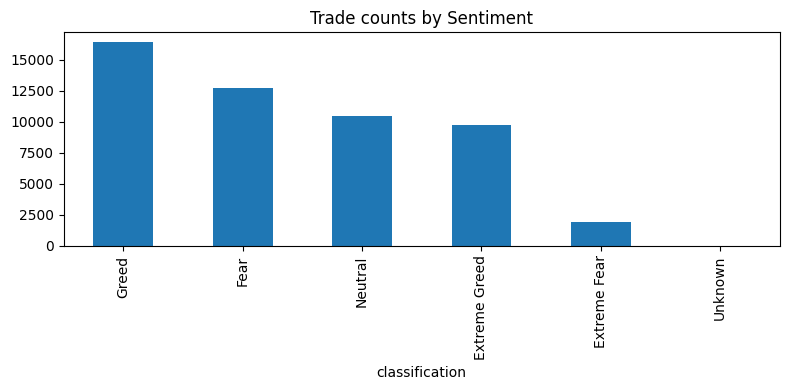

In [21]:
plt.figure(figsize=(8,4))
trades['classification'].value_counts().plot(kind='bar')
plt.title("Trade counts by Sentiment")
plt.tight_layout()
plt.savefig("ds_divyank/outputs/count_by_sentiment.png")
plt.show()


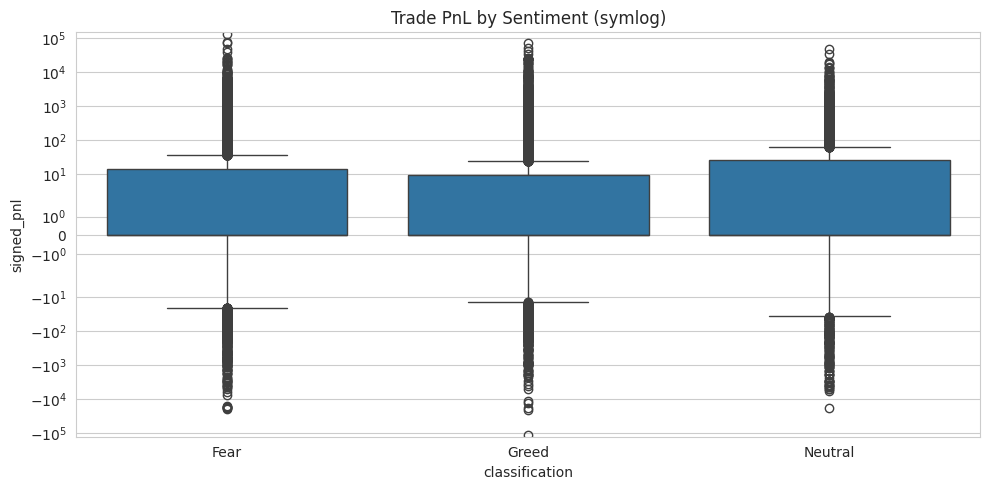

In [29]:
# 2) Boxplot PnL by sentiment
plt.figure(figsize=(10,5))
sns.boxplot(data=trades[trades['classification'].isin(['Fear','Greed','Neutral'])], x='classification', y='signed_pnl')
plt.yscale('symlog')
plt.title("Trade PnL by Sentiment (symlog)")
plt.tight_layout()
plt.savefig("ds_divyank/outputs/pnl_by_sentiment.png")
plt.show()






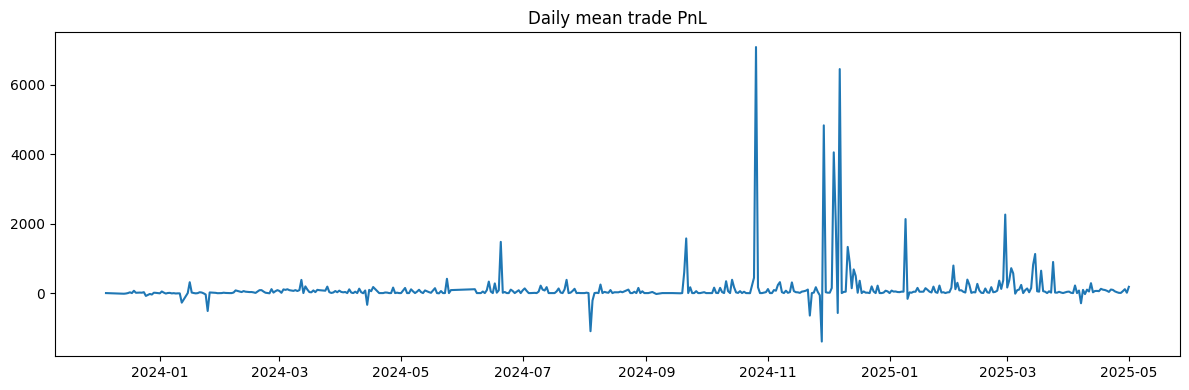

In [23]:
# 3) Daily mean PnL time series
daily = trades.groupby('date').agg(mean_pnl=('signed_pnl','mean'), trade_count=('signed_pnl','count')).reset_index()
plt.figure(figsize=(12,4))
plt.plot(daily['date'], daily['mean_pnl'])
plt.title("Daily mean trade PnL")
plt.tight_layout()
plt.savefig("ds_divyank/outputs/daily_mean_pnl.png")
plt.show()


In [24]:
fear = trades[trades['classification']=='Fear']['signed_pnl'].dropna()
greed = trades[trades['classification']=='Greed']['signed_pnl'].dropna()

print("Counts — Fear:", len(fear), "Greed:", len(greed))
if len(fear) > 20 and len(greed) > 20:
    t_stat, p_val = stats.ttest_ind(fear, greed, equal_var=False)
    print("t-stat:", t_stat, "p-value:", p_val)
else:
    print("Not enough samples for reliable t-test - show nonparametric test instead.")
    u_stat, p_val_u = stats.mannwhitneyu(fear, greed, alternative='two-sided')
    print("Mann-Whitney U:", u_stat, "p-value:", p_val_u)


Counts — Fear: 12688 Greed: 16373
t-stat: 2.5329640471629387 p-value: 0.011316549946641136


In [25]:
# Prepare regression dataframe
reg = trades.copy()
reg = reg[['signed_pnl','exposure','weekday','classification']].dropna(subset=['signed_pnl'])
# create dummies for weekday and Classification
reg = pd.get_dummies(reg, columns=['weekday','classification'], drop_first=True)

# Convert boolean columns to integers
for col in reg.columns:
    if reg[col].dtype == 'bool':
        reg[col] = reg[col].astype(int)

y = reg['signed_pnl']
X = reg.drop(columns=['signed_pnl'])
X = sm.add_constant(X.fillna(0))
model = sm.OLS(y, X).fit(cov_type='HC1')
print(model.summary())

# Save regression results summary to text file
with open("ds_divyank/outputs/regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:             signed_pnl   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.558
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           7.50e-12
Time:                        12:24:45   Log-Likelihood:            -4.4905e+05
No. Observations:               51122   AIC:                         8.981e+05
Df Residuals:                   51109   BIC:                         8.982e+05
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [26]:
# Per-account stats
if 'Account' in trades.columns:
    agg = trades.groupby('Account').agg(
        total_trades = ('signed_pnl','count'),
        total_pnl = ('signed_pnl','sum'),
        mean_pnl = ('signed_pnl','mean'),
        median_pnl = ('signed_pnl','median'),

    )
    # Simple alternative for win_rate if above fails:
    wins = trades[trades['signed_pnl']>0].groupby('Account').size().rename('wins')
    totals = trades.groupby('Account').size().rename('totals')
    acct = pd.concat([wins, totals], axis=1).fillna(0)
    acct['win_rate'] = acct['wins'] / (acct['totals'].replace(0, np.nan))
    acct = acct.reset_index()
    acct.to_csv("ds_divyank/csv_files/account_stats.csv", index=False)
    print("Saved account stats to csv_files/account_stats.csv")
else:
    print("No 'account' column found; skipping account-level aggregation.")

Saved account stats to csv_files/account_stats.csv


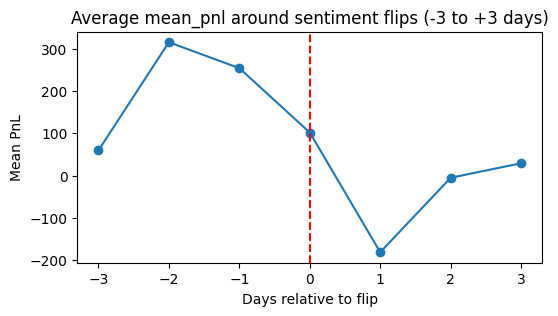

In [27]:
# Simple event study: find days where Classification changes (Fear->Greed or Greed->Fear)
fg_sorted = fg.sort_values('date')
fg_sorted['prev'] = fg_sorted['classification'].shift(1)
flips = fg_sorted[fg_sorted['classification'] != fg_sorted['prev']].dropna(subset=['prev'])
flips = flips[flips['prev'].isin(['Fear','Greed']) & flips['classification'].isin(['Fear','Greed'])]
flips = flips[['date','prev','classification']].reset_index(drop=True)
flips.head()

# For each flip, compute mean pnl -3..+3 days
event_results = []
for _, row in flips.iterrows():
    dt = row['date']
    window = daily[(daily['date'] >= dt - pd.Timedelta(days=3)) & (daily['date'] <= dt + pd.Timedelta(days=3))]
    if len(window) >= 3:
        window = window.assign(event_day = (window['date'] - dt).dt.days)
        window = window[['event_day','mean_pnl']].set_index('event_day').reindex(range(-3,4))
        event_results.append(window['mean_pnl'].values)

if event_results:
    event_matrix = np.vstack([er for er in event_results])
    mean_event = np.nanmean(event_matrix, axis=0)
    plt.figure(figsize=(6,3))
    plt.plot(range(-3,4), mean_event, marker='o')
    plt.axvline(0, color='red', linestyle='--')
    plt.title("Average mean_pnl around sentiment flips (-3 to +3 days)")
    plt.xlabel("Days relative to flip")
    plt.ylabel("Mean PnL")
    plt.savefig("ds_divyank/outputs/event_study_flip.png")
    plt.show()
else:
    print("Not enough flips / daily data to perform event study.")


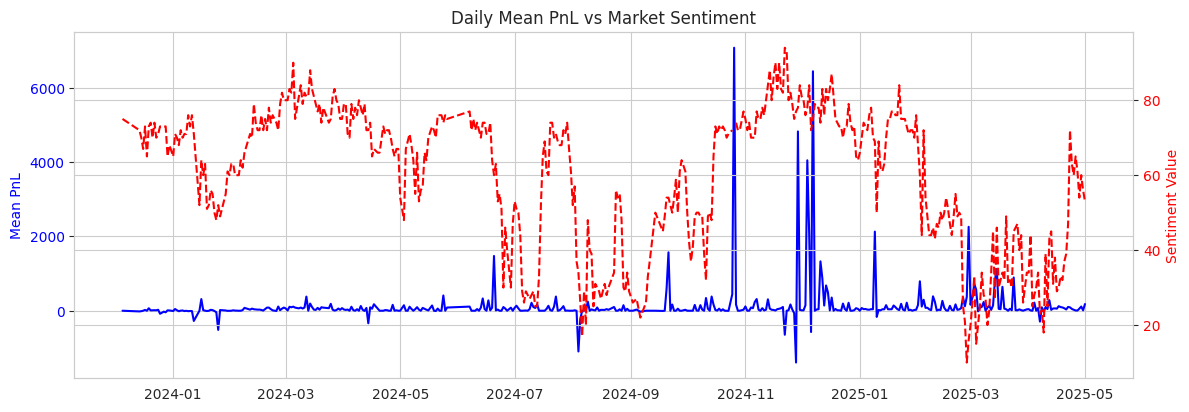

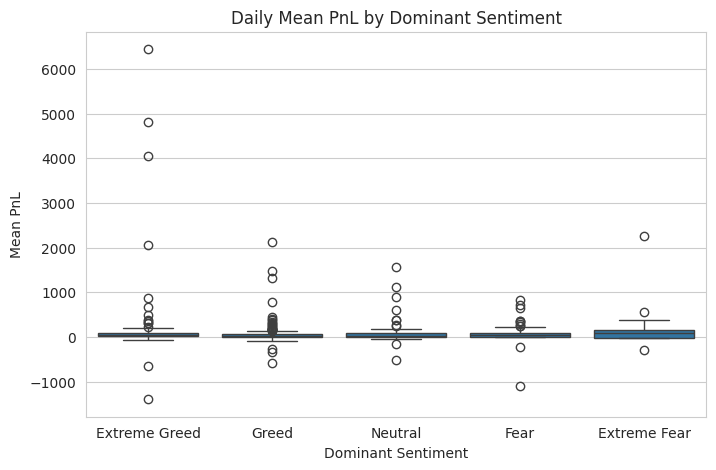

Correlation between PnL and sentiment intensity:
                       mean_pnl  mean_sentiment_value
mean_pnl              1.000000              0.028993
mean_sentiment_value  0.028993              1.000000


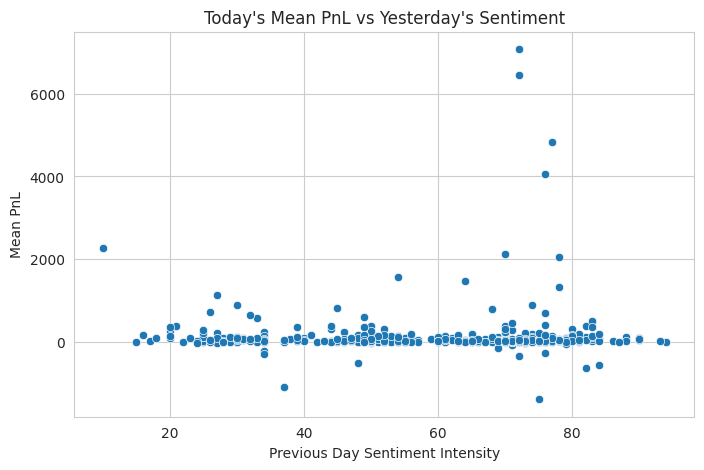

Lagged correlation (prev sentiment → PnL):
                 mean_pnl  prev_sentiment
mean_pnl        1.000000        0.021566
prev_sentiment  0.021566        1.000000


In [31]:
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce').dt.date

daily_pnl = trades.groupby('date').agg(
    mean_pnl=('signed_pnl','mean'),
    trade_count=('signed_pnl','count')
).reset_index()

# ===============================
# 3️⃣ Prepare Sentiment Data
# ===============================
# Assuming 'sentiment_df' has: 'timestamp', 'sentiment', 'value'
fg['date'] = pd.to_datetime(fg['timestamp'], unit='s', errors='coerce').dt.date

daily_sentiment = fg.groupby('date').agg(
    mean_sentiment_value=('value', 'mean'),
    dominant_sentiment=('classification', lambda x: x.mode()[0])  # most frequent sentiment
).reset_index()


# ===============================
# 4️⃣ Merge Daily PnL & Sentiment
# ===============================
daily_merged = daily_pnl.merge(daily_sentiment, on='date', how='left')

# ===============================
# 5️⃣ Time Series Plot: PnL vs Sentiment
# ===============================
fig, ax1 = plt.subplots(figsize=(12,4))

# Mean PnL
ax1.plot(daily_merged['date'], daily_merged['mean_pnl'], color='blue', label='Mean PnL')
ax1.set_ylabel('Mean PnL', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Sentiment intensity
ax2 = ax1.twinx()
ax2.plot(daily_merged['date'], daily_merged['mean_sentiment_value'], color='red', linestyle='--', label='Sentiment Intensity')
ax2.set_ylabel('Sentiment Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Daily Mean PnL vs Market Sentiment')
plt.show()

# ===============================
# 6️⃣ Boxplot: PnL by Dominant Sentiment
# ===============================
plt.figure(figsize=(8,5))
sns.boxplot(data=daily_merged, x='dominant_sentiment', y='mean_pnl')
plt.title('Daily Mean PnL by Dominant Sentiment')
plt.ylabel('Mean PnL')
plt.xlabel('Dominant Sentiment')
plt.show()

# ===============================
# 7️⃣ Correlation Analysis
# ===============================
corr = daily_merged[['mean_pnl','mean_sentiment_value']].corr()
print("Correlation between PnL and sentiment intensity:\n", corr)

# ===============================
# 8️⃣ Lagged Effect: Yesterday's Sentiment vs Today's PnL
# ===============================
daily_merged['prev_sentiment'] = daily_merged['mean_sentiment_value'].shift(1)

plt.figure(figsize=(8,5))
sns.scatterplot(data=daily_merged, x='prev_sentiment', y='mean_pnl')
plt.title("Today's Mean PnL vs Yesterday's Sentiment")
plt.xlabel("Previous Day Sentiment Intensity")
plt.ylabel("Mean PnL")
plt.show()

lag_corr = daily_merged[['mean_pnl','prev_sentiment']].corr()
print("Lagged correlation (prev sentiment → PnL):\n", lag_corr)

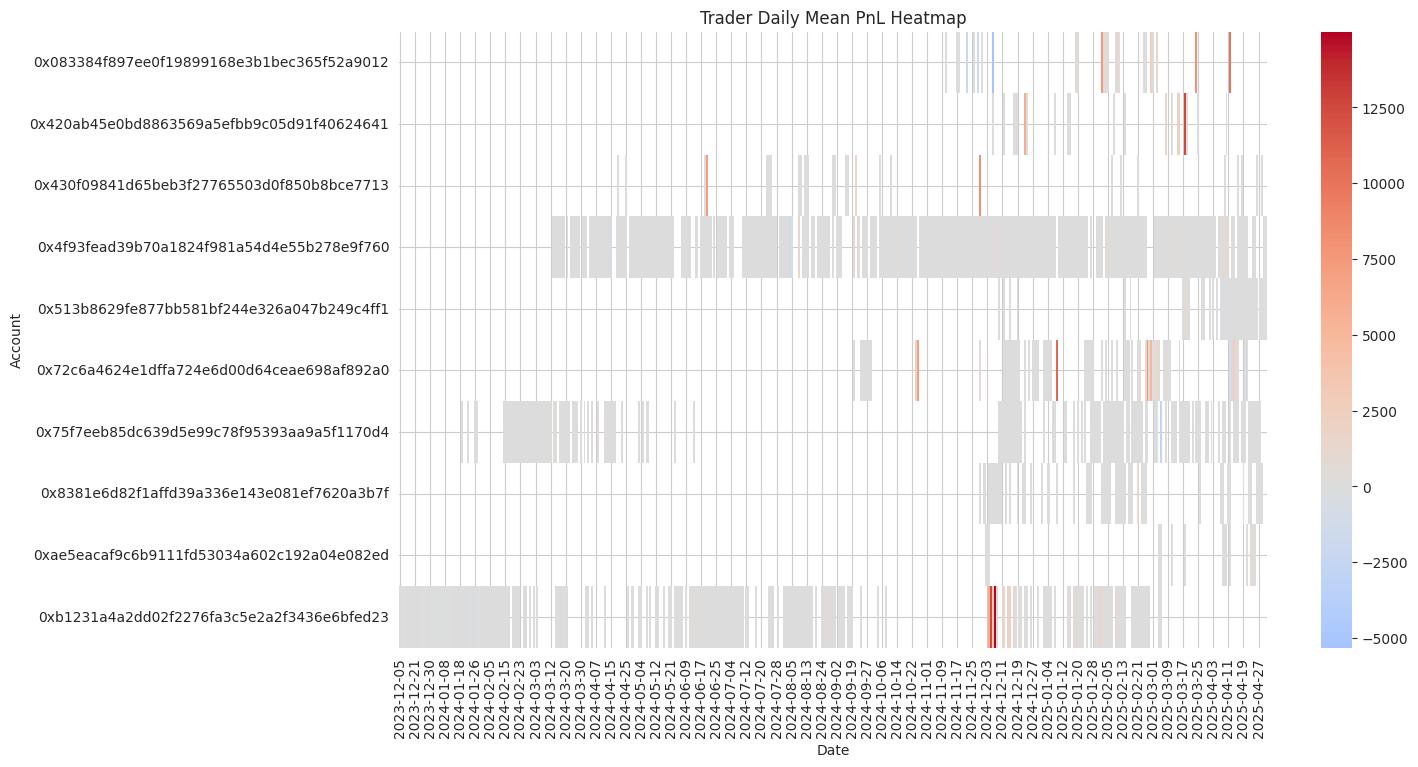

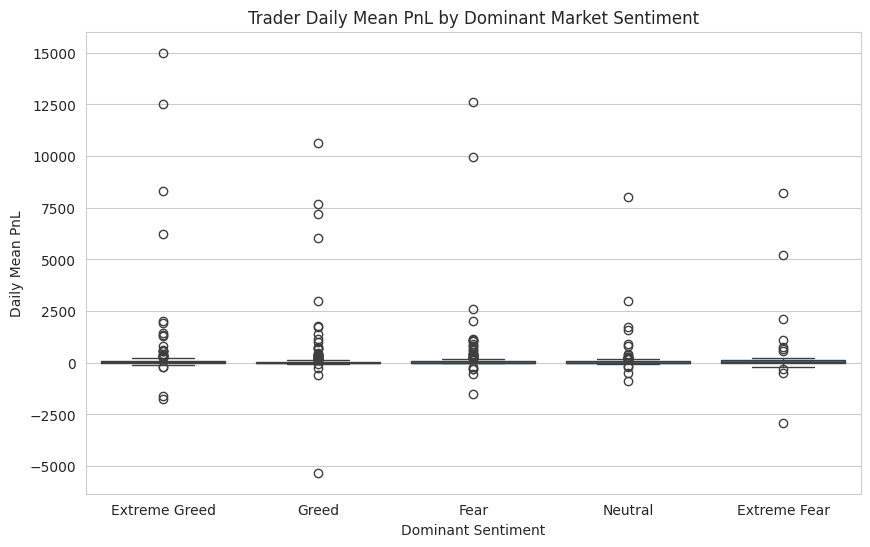

                                      Account  Correlation_PnL_Sentiment
2  0x430f09841d65beb3f27765503d0f850b8bce7713                   0.373023
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed                   0.345731
6  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4                   0.224985
9  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23                   0.156831
4  0x513b8629fe877bb581bf244e326a047b249c4ff1                   0.075135
7  0x8381e6d82f1affd39a336e143e081ef7620a3b7f                   0.018912
3  0x4f93fead39b70a1824f981a54d4e55b278e9f760                  -0.084698
5  0x72c6a4624e1dffa724e6d00d64ceae698af892a0                  -0.209522
1  0x420ab45e0bd8863569a5efbb9c05d91f40624641                  -0.260062
0  0x083384f897ee0f19899168e3b1bec365f52a9012                  -0.325313


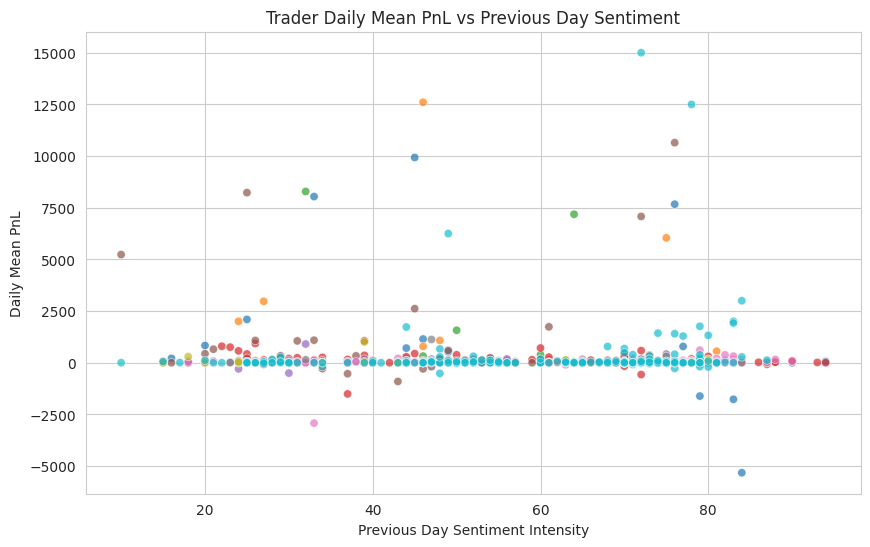

In [33]:
# ===============================
# 1️⃣ Prepare Trader-Level Daily PnL
# ===============================
# trades: 'Account', 'Timestamp IST', 'signed_pnl'
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce').dt.date

trader_daily = trades.groupby(['Account','date']).agg(
    daily_mean_pnl=('signed_pnl','mean'),
    trade_count=('signed_pnl','count'),
    cumulative_pnl=('signed_pnl','sum')
).reset_index()

# ===============================
# 2️⃣ Merge with Daily Sentiment
# ===============================
# daily_sentiment: 'date', 'mean_sentiment_value', 'dominant_sentiment'
trader_merged = trader_daily.merge(daily_sentiment, on='date', how='left')

# ===============================
# 3️⃣ Heatmap: Trader vs Sentiment
# ===============================
# Pivot table: traders as rows, date as columns, values = daily_mean_pnl
pnl_pivot = trader_merged.pivot(index='Account', columns='date', values='daily_mean_pnl')

plt.figure(figsize=(14,8))
sns.heatmap(pnl_pivot, cmap='coolwarm', center=0)
plt.title("Trader Daily Mean PnL Heatmap")
plt.ylabel("Account")
plt.xlabel("Date")
plt.show()

# ===============================
# 4️⃣ Boxplot: Trader Performance under Fear vs Greed
# ===============================
plt.figure(figsize=(10,6))
sns.boxplot(data=trader_merged, x='dominant_sentiment', y='daily_mean_pnl')
plt.title("Trader Daily Mean PnL by Dominant Market Sentiment")
plt.ylabel("Daily Mean PnL")
plt.xlabel("Dominant Sentiment")
plt.show()

# ===============================
# 5️⃣ Correlation: Trader-Level
# ===============================
# Compute correlation for each trader individually
trader_corrs = trader_merged.groupby('Account')[['daily_mean_pnl','mean_sentiment_value']].corr().unstack().iloc[:,1].reset_index()
trader_corrs.columns = ['Account', 'Correlation_PnL_Sentiment']
print(trader_corrs.sort_values(by='Correlation_PnL_Sentiment', ascending=False))

# ===============================
# 6️⃣ Lagged Effect: Yesterday's Sentiment vs Today's Trader PnL
# ===============================
trader_merged['prev_sentiment'] = trader_merged.groupby('Account')['mean_sentiment_value'].shift(1)

plt.figure(figsize=(10,6))
sns.scatterplot(data=trader_merged, x='prev_sentiment', y='daily_mean_pnl', hue='Account', legend=False, alpha=0.7)
plt.title("Trader Daily Mean PnL vs Previous Day Sentiment")
plt.xlabel("Previous Day Sentiment Intensity")
plt.ylabel("Daily Mean PnL")
plt.show()

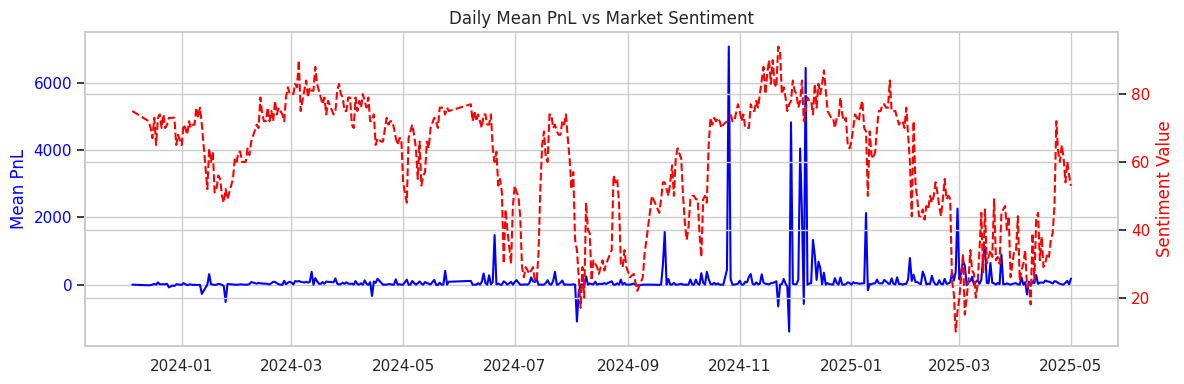

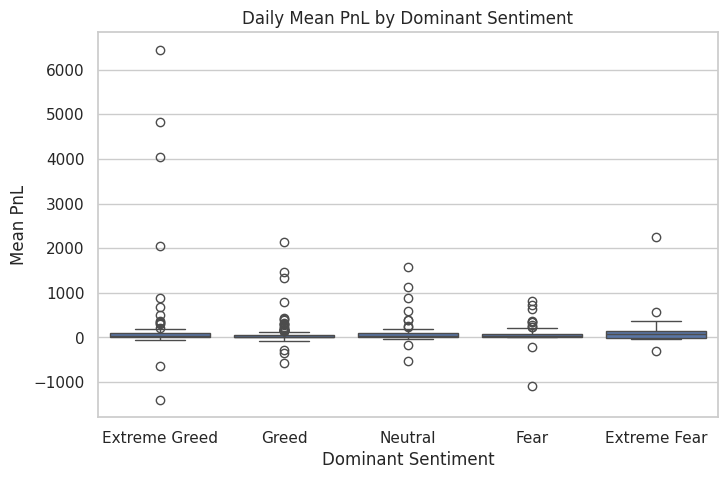

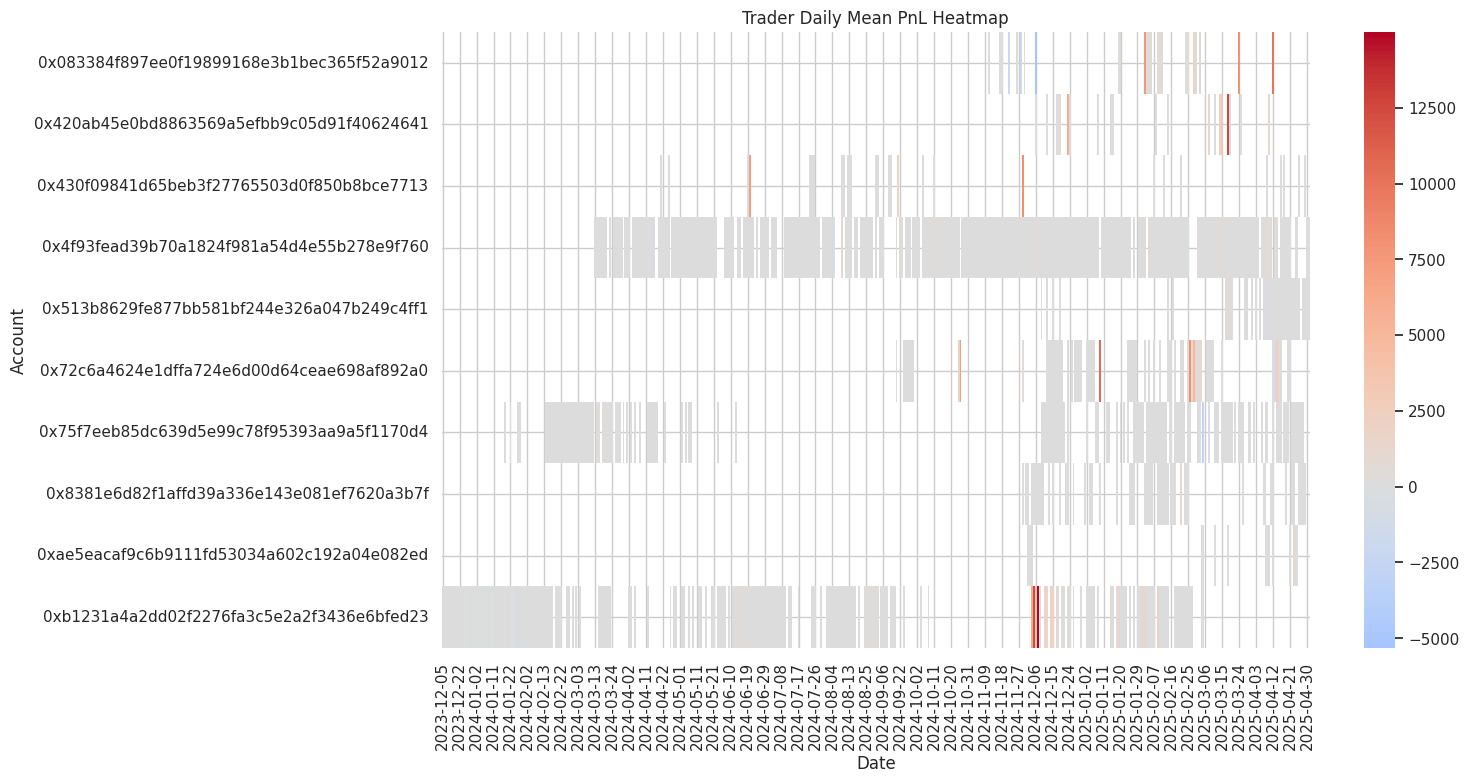

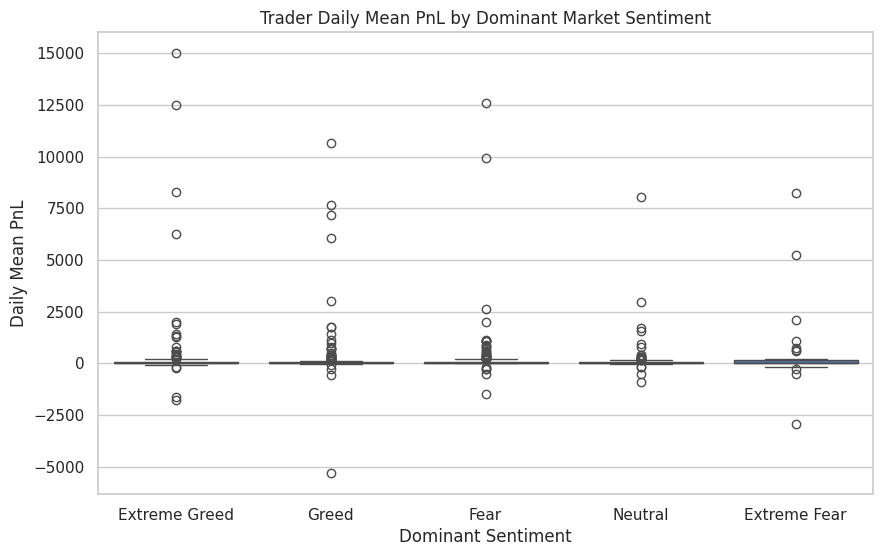

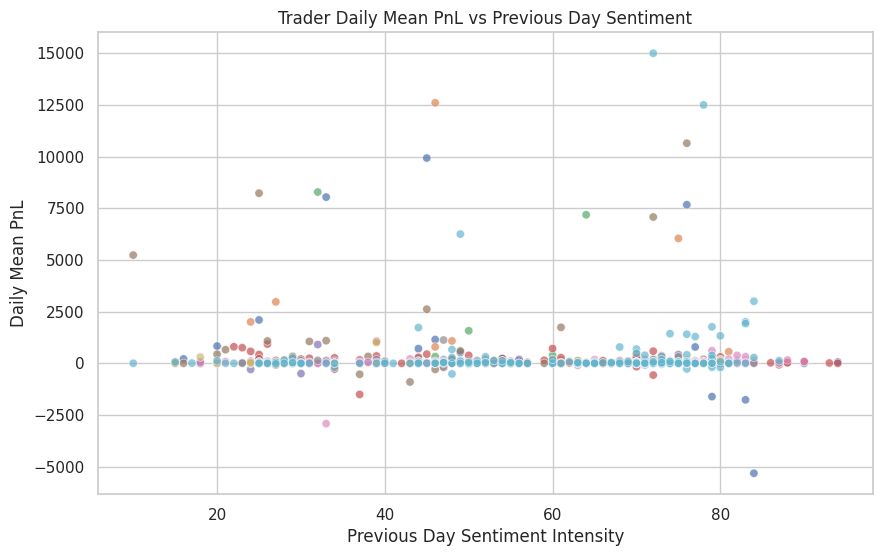

Overall correlation (PnL vs sentiment intensity):
                       mean_pnl  mean_sentiment_value
mean_pnl              1.000000              0.028993
mean_sentiment_value  0.028993              1.000000

Trader-level correlations (PnL vs sentiment intensity):
                                       Account  Correlation_PnL_Sentiment
2  0x430f09841d65beb3f27765503d0f850b8bce7713                   0.373023
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed                   0.345731
6  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4                   0.224985
9  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23                   0.156831
4  0x513b8629fe877bb581bf244e326a047b249c4ff1                   0.075135
7  0x8381e6d82f1affd39a336e143e081ef7620a3b7f                   0.018912
3  0x4f93fead39b70a1824f981a54d4e55b278e9f760                  -0.084698
5  0x72c6a4624e1dffa724e6d00d64ceae698af892a0                  -0.209522
1  0x420ab45e0bd8863569a5efbb9c05d91f40624641                  -0.260062
0 

In [35]:
# ===============================
# 1️⃣ Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for nicer plots
sns.set(style="whitegrid")

# ===============================
# 2️⃣ Prepare Trade Data
# ===============================
# trades: 'Account', 'Timestamp IST', 'signed_pnl'
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce').dt.date

# Daily trader metrics
trader_daily = trades.groupby(['Account','date']).agg(
    daily_mean_pnl=('signed_pnl','mean'),
    trade_count=('signed_pnl','count'),
    cumulative_pnl=('signed_pnl','sum')
).reset_index()

# Daily aggregate metrics
daily_pnl = trades.groupby('date').agg(
    mean_pnl=('signed_pnl','mean'),
    trade_count=('signed_pnl','count')
).reset_index()

# ===============================
# 3️⃣ Prepare Market Sentiment
# ===============================
# sentiment_df: 'timestamp', 'sentiment', 'value'
fg['date'] = pd.to_datetime(fg['timestamp'], unit='s', errors='coerce').dt.date

daily_sentiment = fg.groupby('date').agg(
    mean_sentiment_value=('value', 'mean'),
    dominant_sentiment=('classification', lambda x: x.mode()[0])
).reset_index()

# Merge with daily and trader-level data
daily_merged = daily_pnl.merge(daily_sentiment, on='date', how='left')
trader_merged = trader_daily.merge(daily_sentiment, on='date', how='left')

# ===============================
# 4️⃣ Dashboard Plots
# ===============================

# ---------- 4A: Daily PnL vs Sentiment ----------
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(daily_merged['date'], daily_merged['mean_pnl'], color='blue', label='Mean PnL')
ax1.set_ylabel('Mean PnL', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(daily_merged['date'], daily_merged['mean_sentiment_value'], color='red', linestyle='--', label='Sentiment Intensity')
ax2.set_ylabel('Sentiment Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Daily Mean PnL vs Market Sentiment')
fig.tight_layout()
plt.show()

# ---------- 4B: Boxplot of Daily PnL by Dominant Sentiment ----------
plt.figure(figsize=(8,5))
sns.boxplot(data=daily_merged, x='dominant_sentiment', y='mean_pnl')
plt.title('Daily Mean PnL by Dominant Sentiment')
plt.ylabel('Mean PnL')
plt.xlabel('Dominant Sentiment')
plt.show()

# ---------- 4C: Trader Heatmap ----------
pnl_pivot = trader_merged.pivot(index='Account', columns='date', values='daily_mean_pnl')
plt.figure(figsize=(14,8))
sns.heatmap(pnl_pivot, cmap='coolwarm', center=0)
plt.title("Trader Daily Mean PnL Heatmap")
plt.ylabel("Account")
plt.xlabel("Date")
plt.show()

# ---------- 4D: Trader Boxplot by Sentiment ----------
plt.figure(figsize=(10,6))
sns.boxplot(data=trader_merged, x='dominant_sentiment', y='daily_mean_pnl')
plt.title("Trader Daily Mean PnL by Dominant Market Sentiment")
plt.ylabel("Daily Mean PnL")
plt.xlabel("Dominant Sentiment")
plt.show()

# ---------- 4E: Trader Scatterplot vs Previous Day Sentiment ----------
trader_merged['prev_sentiment'] = trader_merged.groupby('Account')['mean_sentiment_value'].shift(1)
plt.figure(figsize=(10,6))
sns.scatterplot(data=trader_merged, x='prev_sentiment', y='daily_mean_pnl', hue='Account', legend=False, alpha=0.7)
plt.title("Trader Daily Mean PnL vs Previous Day Sentiment")
plt.xlabel("Previous Day Sentiment Intensity")
plt.ylabel("Daily Mean PnL")
plt.show()

# ===============================
# 5️⃣ Correlation Analysis
# ===============================

# Overall correlation
overall_corr = daily_merged[['mean_pnl','mean_sentiment_value']].corr()
print("Overall correlation (PnL vs sentiment intensity):\n", overall_corr)

# Trader-level correlation
trader_corrs = trader_merged.groupby('Account')[['daily_mean_pnl','mean_sentiment_value']].corr().unstack().iloc[:,1].reset_index()
trader_corrs.columns = ['Account', 'Correlation_PnL_Sentiment']
print("\nTrader-level correlations (PnL vs sentiment intensity):\n", trader_corrs.sort_values(by='Correlation_PnL_Sentiment', ascending=False))

# ===============================
# 6️⃣ Optional Advanced Metrics
# ===============================

# Risk metrics per trader
trader_risk = trader_merged.groupby('Account').agg(
    avg_daily_pnl=('daily_mean_pnl','mean'),
    pnl_std=('daily_mean_pnl','std'),
    max_daily_loss=('daily_mean_pnl','min')
).reset_index()
print("\nTrader Risk Metrics:\n", trader_risk.sort_values(by='avg_daily_pnl', ascending=False))

# Ensure saved outputs exist - these are already saved by the plotting code. Save a small summary table too.
summary = {
    'total_trades': len(trades),
    'unique_accounts': trades['account'].nunique() if 'account' in trades.columns else None,
    'date_range': (trades['date'].min(), trades['date'].max())
}
pd.Series(summary).to_csv("csv_files/summary_stats.csv")
print("Saved summary csv_files/summary_stats.csv")
